<a href="https://colab.research.google.com/github/Mostafa-Hamidifard/cvx-optimization/blob/main/hw5_p5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt
n = 100
mu1 = 8
mu2 = 20
sigma1 = 6
sigma2 = 17.5
rho = -0.25

r1 = np.linspace(-30,70,n).reshape((-1,1))
r2 = np.linspace(-30,70,n).reshape((-1,1))

temp1 = np.exp(-(r1-mu1)*(r1-mu1)/(2*sigma1**2))
P1 = temp1/sum(temp1)
temp2 = np.exp(-(r2-mu2)*(r2-mu2)/(2*sigma2**2))
P2 = temp2/sum(temp2)


In [ ]:
P = cvx.Variable((n,n))
obj = 0

const1 = [P1 == P @ np.ones((n,1)) , P2 == P.T @ np.ones((n,1))]
const2 = [(r1-mu1).T @ P @ (r2-mu2) == sigma1 * sigma2 * rho]
const3 = [P>=0] 
for i in range(n):
    for j in range(n):
        if r1[i]+r2[j] <= 0:
            obj += P[i][j]
const = const1 + const2 + const3
objective = cvx.Maximize(obj)
problem = cvx.Problem(objective,const)
ploss_max = problem.solve()


maximum Ploss is: 0.1920364487195592


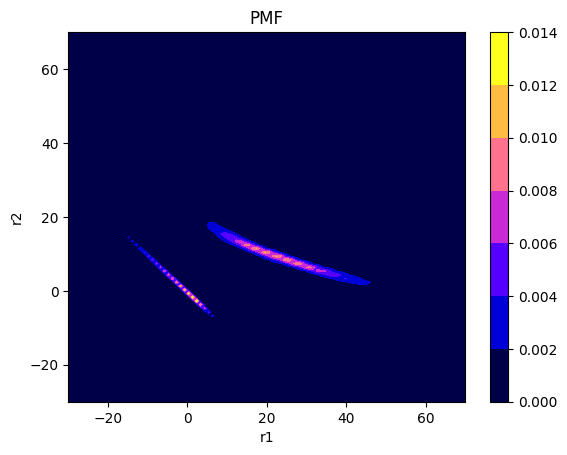

In [ ]:
print(f'maximum Ploss is: {ploss_max}')
P_opt = P.value
X, Y = np.meshgrid(r1, r2)
P_opt[P_opt<0] = 0
Z = P_opt
fig,ax=plt.subplots(1,1)
mycmap1 = plt.get_cmap('gnuplot2')
cp = ax.contourf(X, Y, Z,cmap=mycmap1)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('PMF')
ax.set_xlabel('r1')
ax.set_ylabel('r2')
plt.show()

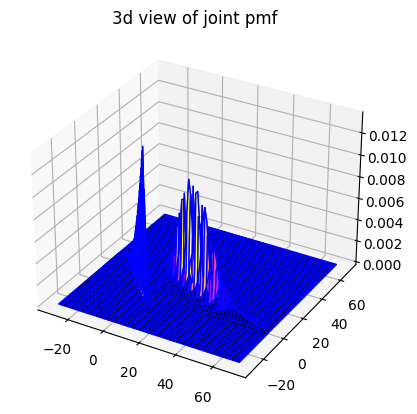

In [50]:
# defining surface and axes
fig = plt.figure()
 
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
# syntax for plotting
ax.plot_surface(X, Y, Z, cmap ='gnuplot2',edgecolor ='Blue')
ax.set_title('3d view of joint pmf')
plt.show()